<a href="https://colab.research.google.com/github/nhat132940/CS114.L21.KHCL/blob/main/HandWrritenDigitsRecognize_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

**Import một số thư viện cần thiết:**









In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment

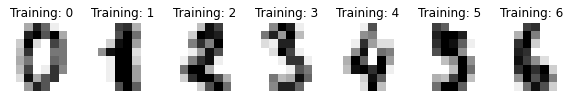

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

**Thông tin về dataset: gồm 1797 ma trận 8:8**




In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
# Trải ảnh
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Tạo phân lớp: SVC
clf = svm.SVC(gamma=0.001) 

# Chia dữ liệu thành 40% test và 60% train
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.4, shuffle=False)

# Học các số dựa trên dữ liệu train
clf.fit(X_train, y_train)

# Dự đoán số trên bộ test
predicted = clf.predict(X_test)


In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.96      0.97        73
           2       0.99      0.97      0.98        71
           3       0.97      0.84      0.90        74
           4       0.99      0.96      0.97        74
           5       0.95      0.99      0.97        71
           6       0.99      0.99      0.99        74
           7       0.95      1.00      0.97        72
           8       0.92      1.00      0.96        68
           9       0.95      0.97      0.96        71

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.96       719
weighted a

**Tạo Confusion Matrix từ train và test:**

Confusion matrix:
[[70  0  0  0  1  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  1  1]
 [ 1  0 69  1  0  0  0  0  0  0]
 [ 0  0  0 62  0  3  0  4  5  0]
 [ 0  0  0  0 71  0  0  0  0  3]
 [ 0  0  0  0  0 70  1  0  0  0]
 [ 0  1  0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0  0  0 68  0]
 [ 0  0  0  1  0  1  0  0  0 69]]


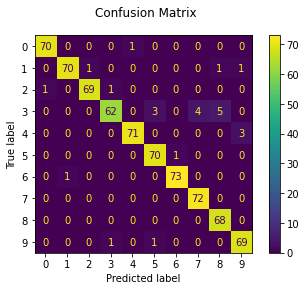

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
import pickle
pkl_filename = "model_svm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

**7 test samples và dự đoán.**

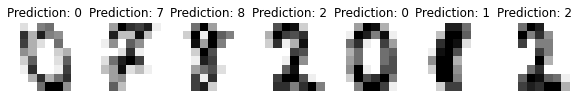

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

**Sử dụng webcam**


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
#Capture camera
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
#source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq

**Chụp ảnh và dự đoán số**

<IPython.core.display.Javascript object>

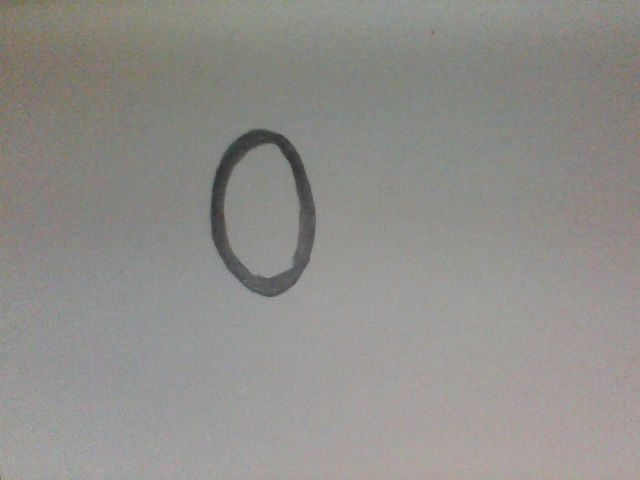

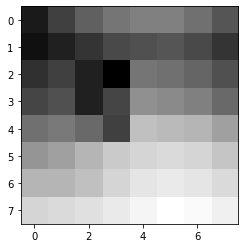

Predict:  [1]


<IPython.core.display.Javascript object>

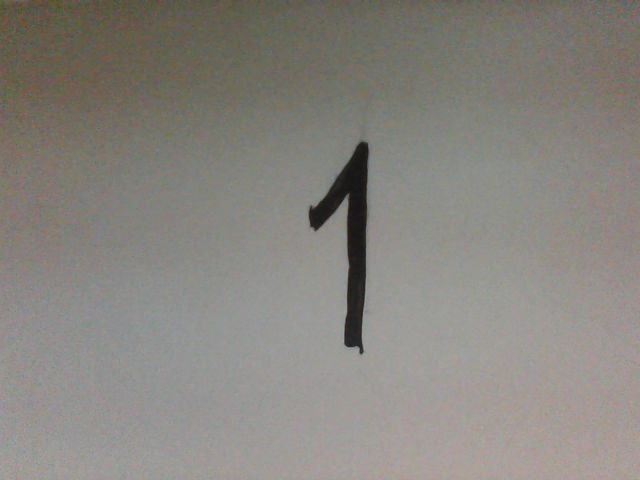

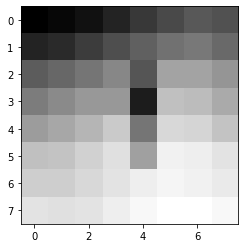

Predict:  [1]


<IPython.core.display.Javascript object>

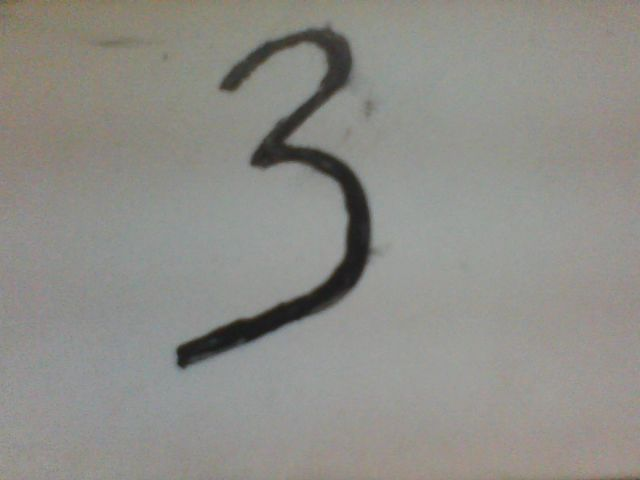

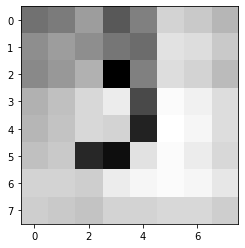

Predict:  [1]


<IPython.core.display.Javascript object>

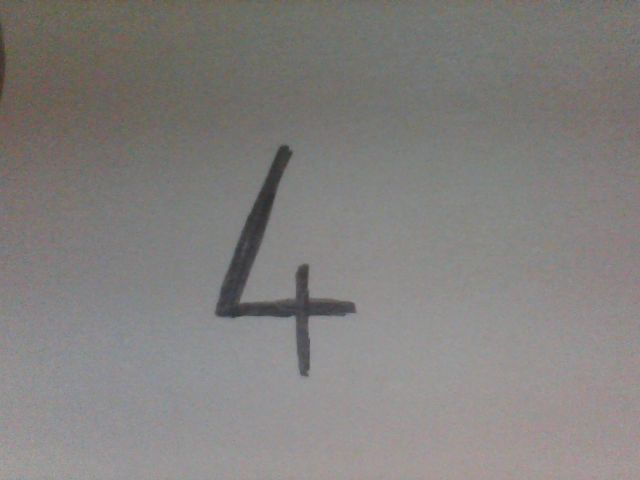

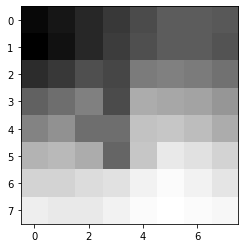

Predict:  [1]


<IPython.core.display.Javascript object>

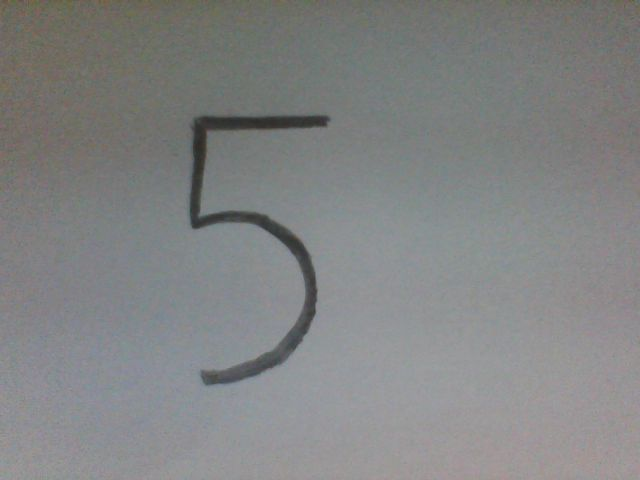

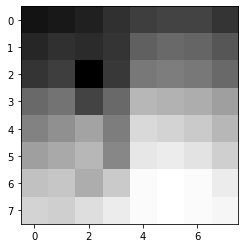

Predict:  [1]


<IPython.core.display.Javascript object>

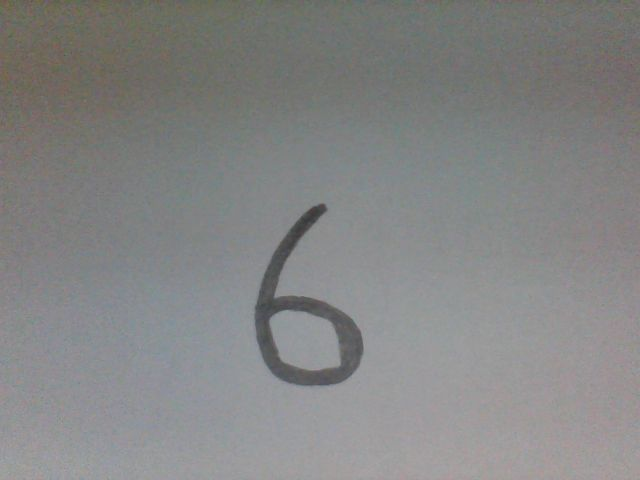

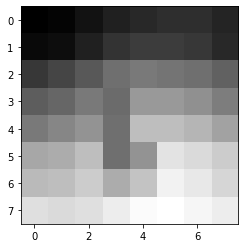

Predict:  [1]


<IPython.core.display.Javascript object>

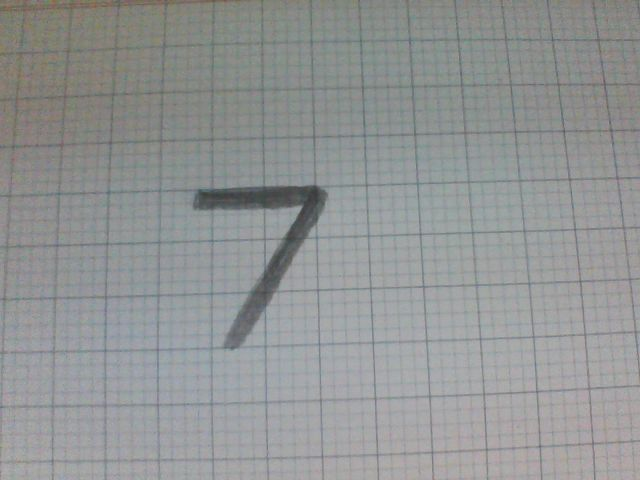

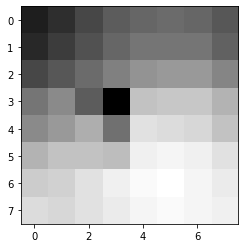

Predict:  [1]


<IPython.core.display.Javascript object>

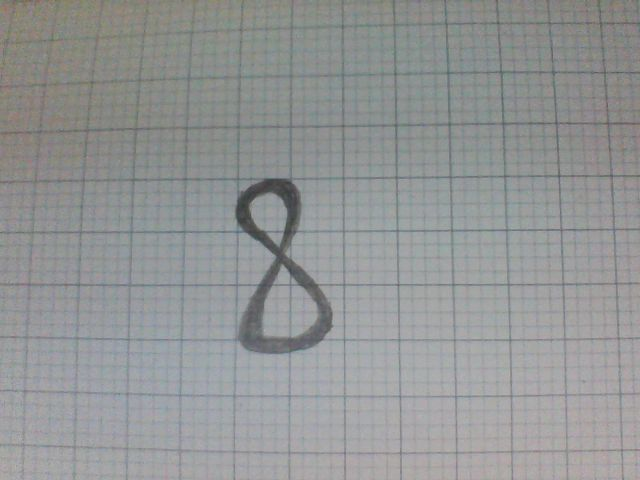

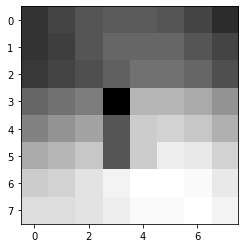

Predict:  [1]


<IPython.core.display.Javascript object>

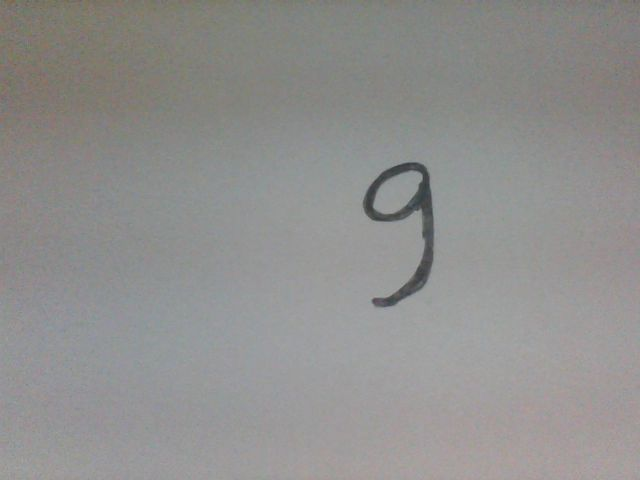

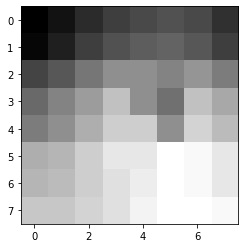

Predict:  [1]


<IPython.core.display.Javascript object>

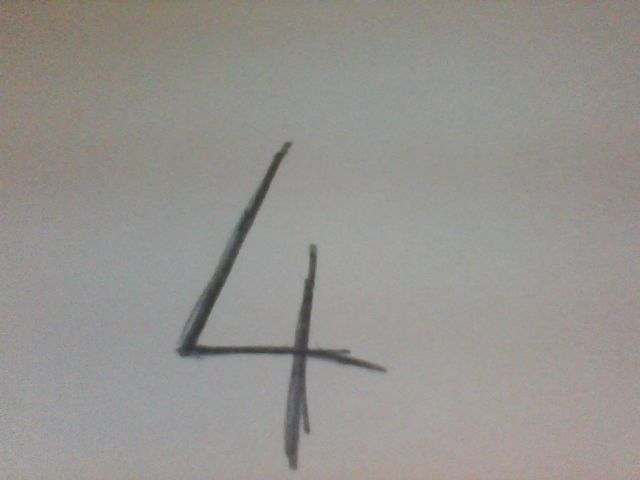

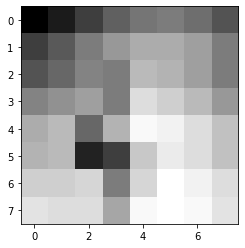

Predict:  [1]


In [32]:
from IPython.display import Image

for i in range(10):
  try:
    filename = take_photo()
  
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    #Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab
  
  
#Xử lý ảnh và dự đoán kết quả 
  image = cv2.imread('photo.jpg')
  image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resize = cv2.resize(image1, (8, 8), interpolation = cv2.INTER_AREA)
  resize1=resize/2
  plt.imshow(resize1 ,cmap='gray')
  plt.show()
  print("Predict: ",clf.predict(resize1.reshape(1,64)))

## 1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  
  Kết quả chạy thực tế với webcam của laptop với giấy viết tay không thực sự chính xác.
## 2. Nhìn vào đâu để kết luận là tốt hay không?
  
  Nhận xét từ dự đoán của các ảnh chụp từ webcam.

## 3. Nếu không tốt thì lý do tại sao?

  -Do bộ dữ liệu để train chưa đủ lớn.

  -Do các yếu tố: nét chữ đậm nhạt,chữ đẹp xấu,ánh sáng môi trường,..

  -Do bước xử lí ảnh có thể chưa tốt, đôi khi làm mất dữ liệu của ảnh.
## 4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
   
   Theo em bài toán nhận diện chữ số đơn giản như trên mà model chưa đưa ra kết quả chính xác thì khó có thể áp dụng vào bài toán thực tế nhận biết biển số nhà.Vì biển số nhà có nhiều chữ số,chữ cái và kí tự (ex: 71/62A).
  